<h1>目录<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
%matplotlib inline
raw_path = r'/home/liucc/Workspace/Ellipse/03_results/01_industry/01_raw/'
trans_path = r'/home/liucc/Workspace/Ellipse/03_results/01_industry/02_transfer/'


In [2]:
import os 
fnames = os.listdir(raw_path)
fnames = [n[:-4] for n in fnames if n[-3:]=='jpg']
fnames.sort()
print(fnames[:10])

['001', '002', '003', '004', '005', '006', '007', '008', '009', '010']


In [3]:
import sys
sys.path.append('/home/liucc/Workspace/Ellipse/01_data')
from cc_process_image import *
import imageio

raws = get_all_images(f'{raw_path}',fnames,'jpg')
trans = get_all_images(f'{trans_path}',fnames,'png')

print(len(raws))

/home/liucc/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


66


In [4]:
from skimage.feature import canny
from skimage.morphology import thin

_id = 24

sigmas = [0,1,2,3]
titles = ['Original','Our']+[f'Sigma={s}' for s in sigmas]

imc = [raws[_id],thin(trans[_id])]
for sigma in range(4):
    im = canny(preprocess_image(raws[_id]), sigma=sigma)
    imc.append(im)

        
print(titles)

['Original', 'Our', 'Sigma=0', 'Sigma=1', 'Sigma=2', 'Sigma=3']


In [5]:
ims = [imc]
recs = [[125,175,310,360],[440,490,415,465]]

for rec in recs:
    imcc = [im[rec[2]:rec[3],rec[0]:rec[1]] for im in imc]
    ims.append(imcc)

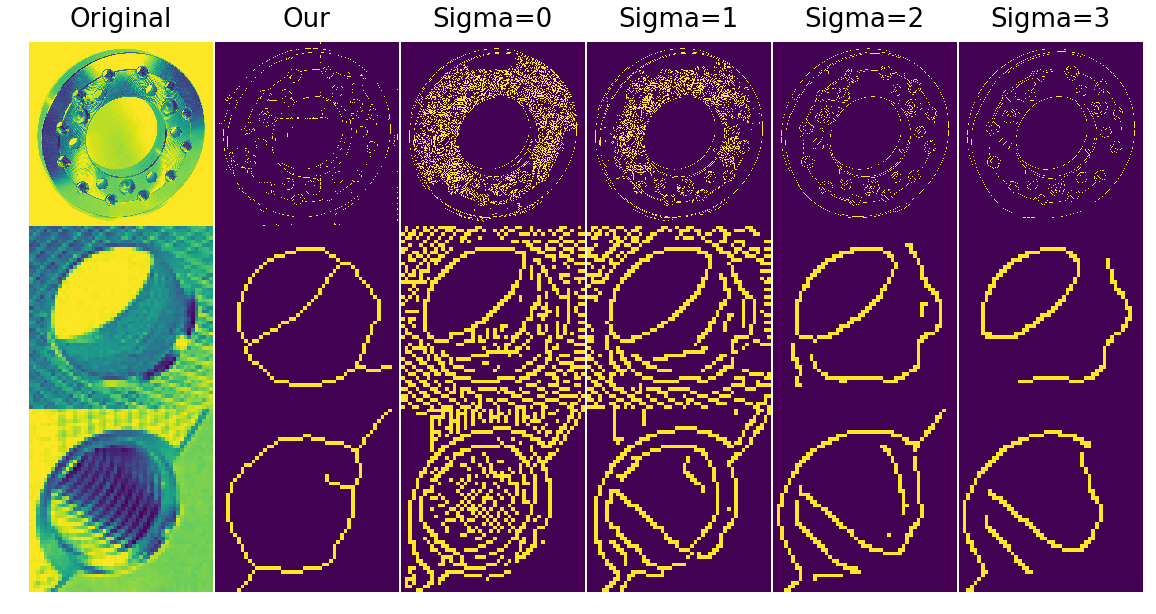

In [8]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from pylab import *
from matplotlib import rcParams
rcParams['axes.titlepad'] = 15 

from matplotlib.font_manager import FontProperties
fp = FontProperties(family="DejaVu Sans",size=26)


hs = [imc[0].shape[0]/imc[0].shape[1] for imc in ims]


fig = plt.figure(figsize=(20,sum(hs)*20/len(titles)+0.1))
gs = gridspec.GridSpec(len(ims),len(titles),
                       wspace=0.0,
                       hspace=0.0,
                       width_ratios=[1]*len(titles),
                       height_ratios=hs,
                       )

for i in range(len(ims)):
    
    for j in range(len(titles)):
        
        ax = fig.add_subplot(gs[i,j])
        im = ims[i][j]
        
        ax.imshow(im)
        
        if i==0:
            ax.set_title(titles[j],fontproperties=fp)
            
        ax.axis('off')
    

plt.show()

pp = PdfPages('images/canny_cmp.pdf')
pp.savefig(fig,dpi=300)
pp.close()

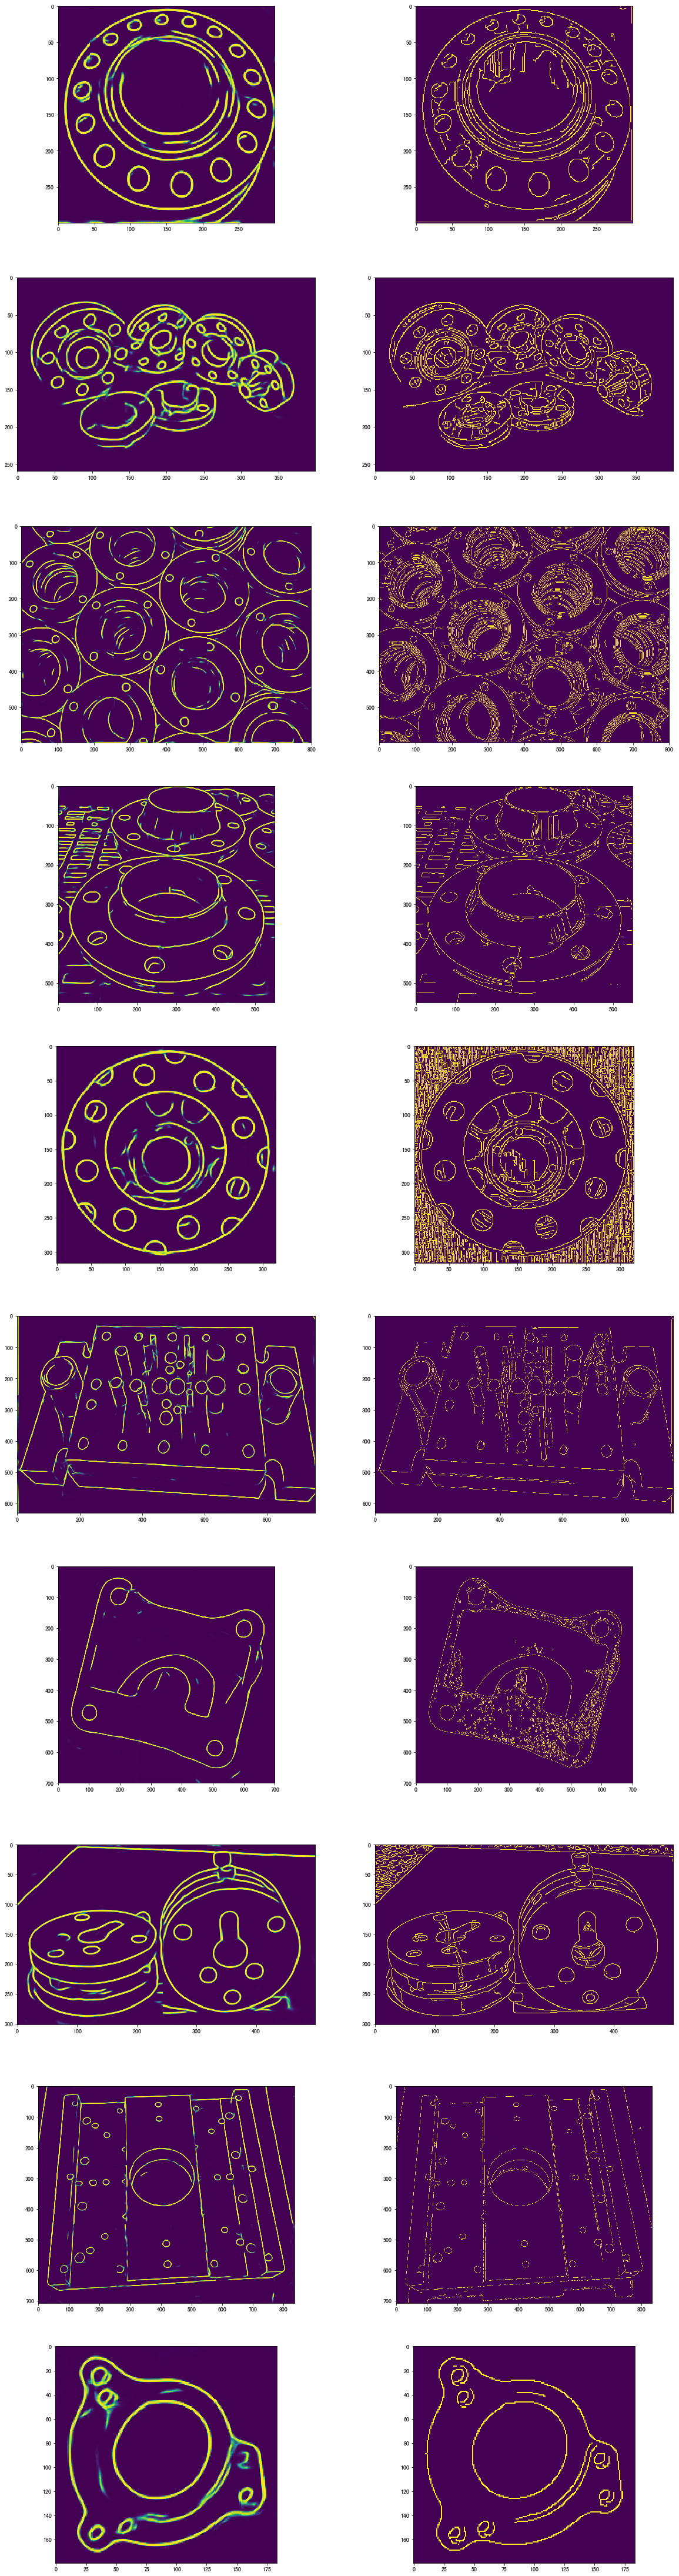

In [16]:
num = 10

_,axes = plt.subplots(nrows=num,ncols=2,figsize=(20,80))

rid = np.random.permutation(len(raws))

for i in range(num):
    _id = rid[i]
    
    axes[i][0].imshow(trans[_id])
    axes[i][1].imshow(canny(raws[_id], sigma=1))
    
plt.show()